In [27]:
import numpy as np
import pandas as pd

import requests

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [3]:
import pathlib

In [4]:
tf.keras.utils.set_random_seed(42)  # sets seeds for base-python, numpy and tf
tf.config.experimental.enable_op_determinism()

In [25]:
from statistics import mean
from collections import defaultdict
import json
import requests

# from datetime import datetime, timedelta
# 
data = requests.get('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AAPL&apikey=ECJCTAUGNRXNF2LN&outputsize=full')
data = data.json().get('Time Series (Daily)')
filtered_data = {k: v for k, v in data.items() if k.startswith("2023")}
array_data = [[k] + list(v.values()) for k, v in filtered_data.items()]

array_data

[['2023-12-29', '193.9000', '194.4000', '191.7250', '192.5300', '42672148'],
 ['2023-12-28', '194.1400', '194.6600', '193.1700', '193.5800', '34049898'],
 ['2023-12-27', '192.4900', '193.5000', '191.0900', '193.1500', '47899806'],
 ['2023-12-26', '193.6100', '193.8900', '192.8300', '193.0500', '28919310'],
 ['2023-12-22', '195.1800', '195.4100', '192.9700', '193.6000', '37149570'],
 ['2023-12-21', '196.1000', '197.0800', '193.5000', '194.6800', '46482549'],
 ['2023-12-20', '196.9000', '197.6800', '194.8300', '194.8300', '52242815'],
 ['2023-12-19', '196.1600', '196.9500', '195.8900', '196.9400', '40233138'],
 ['2023-12-18', '196.0900', '196.6300', '194.3900', '195.8900', '55751861'],
 ['2023-12-15', '197.5300', '198.3999', '197.0000', '197.5700', '128538401'],
 ['2023-12-14', '198.0200', '199.6200', '196.1600', '198.1100', '66831572'],
 ['2023-12-13', '195.0900', '198.0000', '194.8500', '197.9600', '70404183'],
 ['2023-12-12', '193.0800', '194.7200', '191.7210', '194.7100', '52696900']

In [31]:
with open('../data.json') as f:
    data = json.load(f)

sentiments_by_date = defaultdict(list)
for item in data:
    for sentiment in item['ticker_sentiment']:
        if sentiment['ticker'] == 'AAPL':
            key = item['time_published'][:4] + "-" + item['time_published'][4:6] + "-" + item['time_published'][6:8]
            sentiments_by_date[key].append(float(sentiment['ticker_sentiment_score']) * float(sentiment['relevance_score']))

# # Calculate the average sentiment score for each day
average_sentiments = {date: mean(scores) for date, scores in sentiments_by_date.items()}
# 
average_sentiments_df = pd.DataFrame(list(average_sentiments.items()), columns=['date', 'average_sentiment'])
# 
# # Convert array_data to DataFrame
array_data_df = pd.DataFrame(array_data, columns=['date', 'open', 'high', 'low', 'close', 'volume'])
# 
# # Merge the two DataFrames on the date column
df = pd.merge(array_data_df, average_sentiments_df, on='date')

df = df.set_index('date').sort_index()

df = df.drop(columns=['high', 'low', 'volume'])

df = df[['close', 'open', 'average_sentiment']]

df[:5]

a = scaler.transform(df)

a

array([[6.99986000e-04, 6.08045568e-02, 6.35348443e-02],
       [1.87596248e-02, 1.25311499e-02, 1.70391131e-01],
       [0.00000000e+00, 1.59487362e-02, 1.64707209e-01],
       [6.43987120e-02, 0.00000000e+00, 4.57019426e-01],
       [7.18185636e-02, 6.34389462e-02, 3.15389880e-01],
       [7.99384012e-02, 6.05197579e-02, 3.69482665e-01],
       [1.18577628e-01, 7.46173015e-02, 2.51706754e-01],
       [1.17457651e-01, 1.12068352e-01, 5.62039051e-01],
       [1.36357273e-01, 8.57244571e-02, 4.76103801e-01],
       [1.52876942e-01, 1.25596298e-01, 7.26201236e-01],
       [1.42657147e-01, 1.53862585e-01, 7.19894178e-01],
       [1.43497130e-01, 1.14916340e-01, 5.31514435e-01],
       [1.79896402e-01, 1.32004272e-01, 3.40504814e-01],
       [2.25255495e-01, 1.72445710e-01, 3.77078560e-01],
       [2.45135097e-01, 2.03559986e-01, 4.78641872e-01],
       [2.35755285e-01, 2.11890352e-01, 7.44114620e-01],
       [2.65154697e-01, 2.44357423e-01, 4.55175687e-01],
       [2.92734145e-01, 2.44143

In [30]:
scaler = MinMaxScaler()
scaler = scaler.fit(df.iloc[:-30, :])
df_for_training_scaled = scaler.transform(df)

scaler_for_inference = MinMaxScaler()
scaler_for_inference.fit_transform(pd.DataFrame(df.iloc[:-30,0]))

array([[6.99986000e-04],
       [1.87596248e-02],
       [0.00000000e+00],
       [6.43987120e-02],
       [7.18185636e-02],
       [7.99384012e-02],
       [1.18577628e-01],
       [1.17457651e-01],
       [1.36357273e-01],
       [1.52876942e-01],
       [1.42657147e-01],
       [1.43497130e-01],
       [1.79896402e-01],
       [2.25255495e-01],
       [2.45135097e-01],
       [2.35755285e-01],
       [2.65154697e-01],
       [2.92734145e-01],
       [2.51714966e-01],
       [2.69774605e-01],
       [2.85734285e-01],
       [3.61192776e-01],
       [4.12711746e-01],
       [3.73932521e-01],
       [4.14811704e-01],
       [3.76592468e-01],
       [3.61892762e-01],
       [3.63852723e-01],
       [4.03611928e-01],
       [3.94512110e-01],
       [4.24331513e-01],
       [4.01651967e-01],
       [3.85412292e-01],
       [3.28433431e-01],
       [3.34453311e-01],
       [3.41313174e-01],
       [3.03653927e-01],
       [3.20593588e-01],
       [3.13453731e-01],
       [2.84054319e-01],


In [10]:
def build_model(input_shape):
    tf.keras.utils.set_random_seed(42)
    model = Sequential()
    
    model.add(LSTM(units = 256, return_sequences = True, input_shape = input_shape))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 256, return_sequences = True))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 128))
    model.add(Dropout(0.2))
    
    model.add(Dense(units=1))
    model.summary()
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [11]:
lstm_model_without_news=build_model((X_train_lstm_without_news.shape[1], X_train_lstm_without_news.shape[2]))
lstm_model_news=build_model((X_train_lstm_news.shape[1], X_train_lstm_news.shape[2]))

history_without_news = lstm_model_without_news.fit(X_train_lstm_without_news, y_train_lstm_without_news, epochs=60, batch_size=64, verbose=1, )

history_news = lstm_model_news.fit(X_train_lstm_news, y_train_lstm_news, epochs=60, batch_size=64, verbose=1, )

/Users/mehmeterayserter/Desktop/Codes/investify/model/venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 5, 256)         │       265,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 5, 256)         │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 987,777 (3.77 MB)

 Trainable params: 987,777 (3.77 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 5, 256)         │       266,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 5, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 5, 256)         │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 988,801 (3.77 MB)

 Trainable params: 988,801 (3.77 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.3406
Epoch 2/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0400
Epoch 3/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0192
Epoch 4/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0336
Epoch 5/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0097
Epoch 6/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0177
Epoch 7/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0105
Epoch 8/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0101
Epoch 9/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0081
Epoch 10/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0079
Epoch 11/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0077
Epoch 12/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0060
Epoch 13/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0073
Epoch 14/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0058
Epoch 15/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0067
Epoch 16/60
4/4 ━━━━━━━━━━━━━━━━━━

In [9]:
#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 5  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future,[0]])

trainX, trainY = np.array(trainX), np.array(trainY)

print('TrainX shape = {}.'.format(trainX.shape))
print('TrainY shape = {}.'.format(trainY.shape))
X_train_lstm_without_news, X_test_lstm_without_news, y_train_lstm_without_news, y_test_lstm_without_news = train_test_split(trainX[:, :, :-1], trainY, test_size=30, shuffle=False)

X_train_lstm_news, X_test_lstm_news, y_train_lstm_news, y_test_lstm_news = train_test_split(trainX, trainY, test_size=30, shuffle=False)

X_train_lstm_without_news.shape,X_train_lstm_news.shape

TrainX shape = (245, 5, 3).
TrainY shape = (245, 1, 1).


((215, 5, 2), (215, 5, 3))

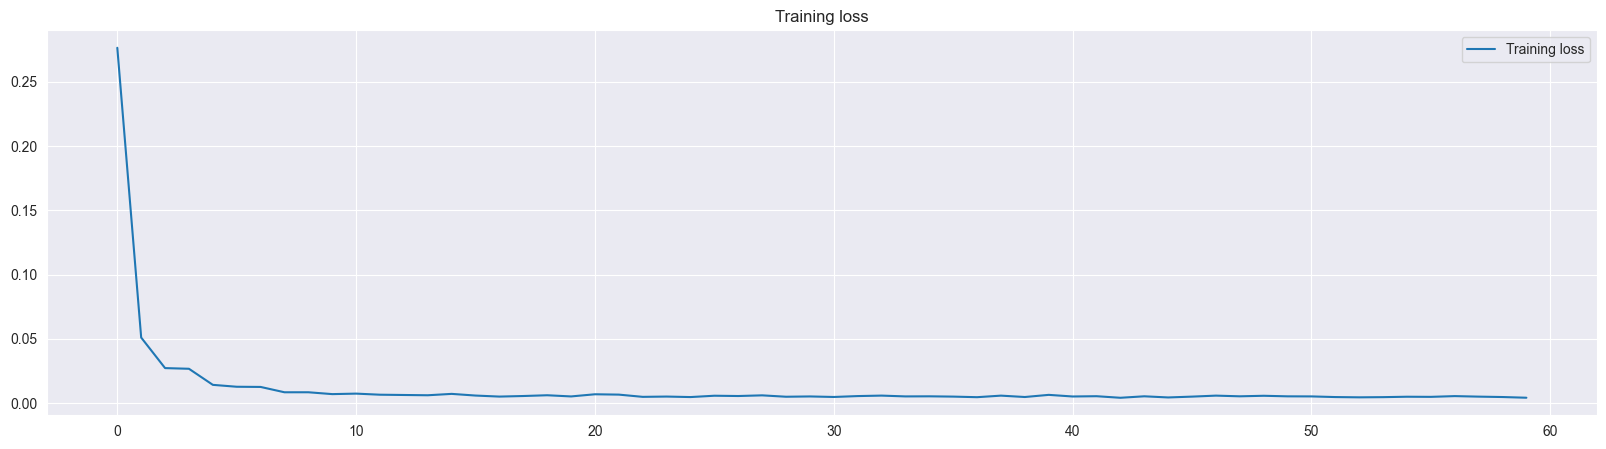

In [12]:
plt.figure(figsize=(20,5))
plt.plot(history_news.history['loss'], label='Training loss')
plt.title('Training loss')
plt.legend()

In [13]:
training_dates= df.index[:X_train_lstm_without_news.shape[0]]
#Make prediction
    
training_prediction_without_news = lstm_model_without_news.predict(X_train_lstm_without_news)

training_prediction_news = lstm_model_news.predict(X_train_lstm_news)

y_train_pred_lstm_without_news = scaler_for_inference.inverse_transform(training_prediction_without_news)

y_train_pred_lstm_news = scaler_for_inference.inverse_transform(training_prediction_news)

y_train_lstm_reshaped_without_news=y_train_lstm_without_news.reshape(y_train_lstm_without_news.shape[0], y_train_lstm_without_news.shape[2])

y_train_actual_lstm = scaler_for_inference.inverse_transform(y_train_lstm_reshaped_without_news)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [14]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

def plot_predictions_with_dates (type, news, dates, y_actual_lstm, y_pred_lstm):
    predicted_features=['close']
    for i,predicted_feature in enumerate(predicted_features):
        plt.figure(figsize=(15,6))
        if news :
            plt.title(f'LSTM {type} prediction of {predicted_feature} feature After adding news sentiment analysis')
        else:
            plt.title(f'LSTM {type} prediction of {predicted_feature} feature without news sentiment analysis')
        sns.lineplot(x=dates, y=y_actual_lstm[:,i],label='Actual')
        sns.lineplot(x=dates, y=y_pred_lstm[:, i], label='Predicted')
        plt.show()
        error=mean_squared_error(y_actual_lstm[:,i], y_pred_lstm[:, i])
        print(f'Mean square error for {predicted_feature} ={error}')
    print('Total mean square error', mean_squared_error(y_actual_lstm, y_pred_lstm))

In [26]:
testing_dates= df.index[-X_test_lstm_without_news.shape[0]:]
#Make prediction
testing_prediction_without_news = lstm_model_without_news.predict(X_test_lstm_without_news)
testing_prediction_news = lstm_model_news.predict(X_test_lstm_news)

y_test_pred_lstm_without_news = scaler_for_inference.inverse_transform(testing_prediction_without_news)
y_test_pred_lstm_news = scaler_for_inference.inverse_transform(testing_prediction_news)

y_test_actual_lstm_reshaped_without_news=y_test_lstm_without_news.reshape(y_test_lstm_without_news.shape[0], y_test_lstm_without_news.shape[2])


y_test_actual_lstm = scaler_for_inference.inverse_transform(y_test_actual_lstm_reshaped_without_news)

X_test_lstm_news

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


array([[[0.80344393, 0.81096476, 0.41973849],
        [0.85930281, 0.8253471 , 0.46380678],
        [0.83690326, 0.85169099, 0.42712697],
        [0.87386252, 0.87846209, 0.42660075],
        [0.88184236, 0.88052688, 0.42071112]],

       [[0.85930281, 0.8253471 , 0.46380678],
        [0.83690326, 0.85169099, 0.42712697],
        [0.87386252, 0.87846209, 0.42660075],
        [0.88184236, 0.88052688, 0.42071112],
        [0.90564189, 0.90509078, 0.53897891]],

       [[0.83690326, 0.85169099, 0.42712697],
        [0.87386252, 0.87846209, 0.42660075],
        [0.88184236, 0.88052688, 0.42071112],
        [0.90564189, 0.90509078, 0.53897891],
        [0.90536189, 0.91477394, 0.52806368]],

       [[0.87386252, 0.87846209, 0.42660075],
        [0.88184236, 0.88052688, 0.42071112],
        [0.90564189, 0.90509078, 0.53897891],
        [0.90536189, 0.91477394, 0.52806368],
        [0.9300014 , 0.90964756, 0.45143183]],

       [[0.88184236, 0.88052688, 0.42071112],
        [0.90564189, 0.905

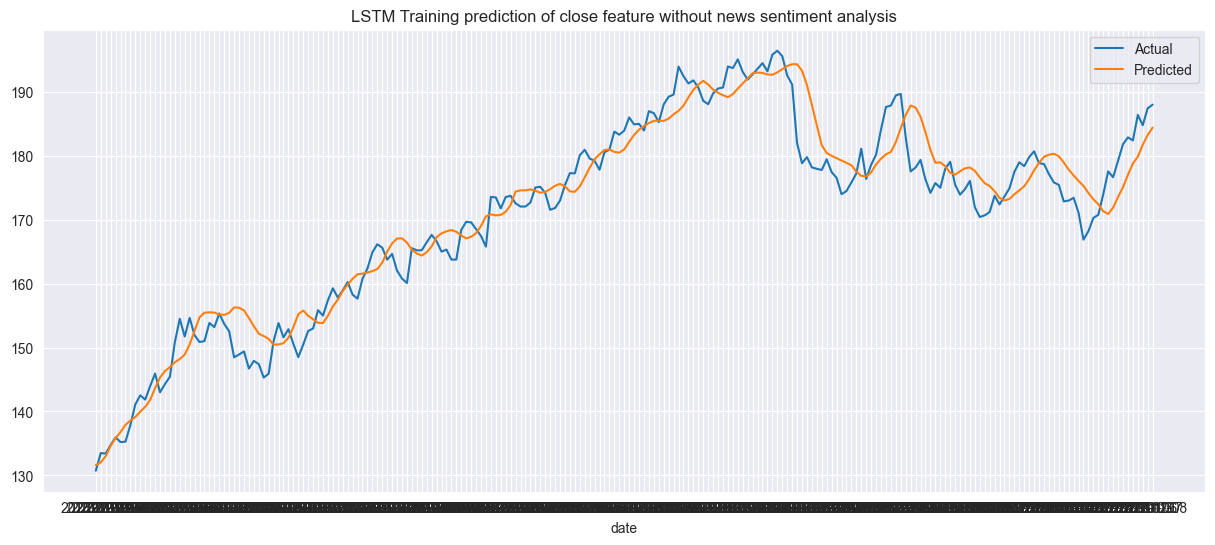

Mean square error for close =15.87135345623394
Total mean square error 15.87135345623394


In [16]:
training_dates= df.index[:X_train_lstm_news.shape[0]]
plot_predictions_with_dates('Training', False, training_dates, y_train_actual_lstm, y_train_pred_lstm_without_news)

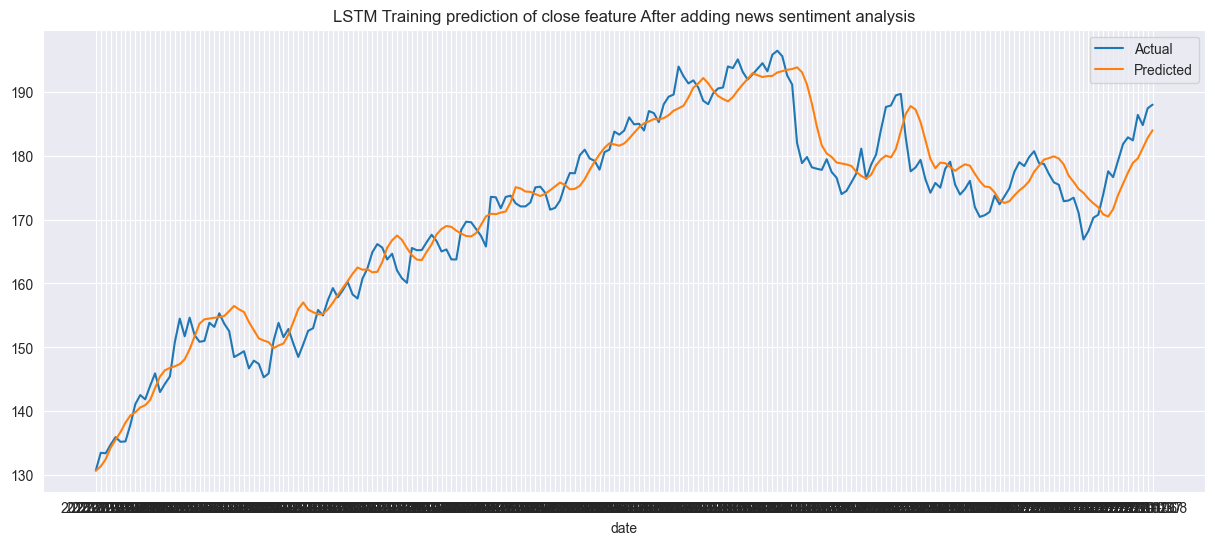

Mean square error for close =15.457631012533623
Total mean square error 15.457631012533623


In [17]:
training_dates= df.index[:X_train_lstm_news.shape[0]]
plot_predictions_with_dates('Training', True, training_dates, y_train_actual_lstm, y_train_pred_lstm_news)

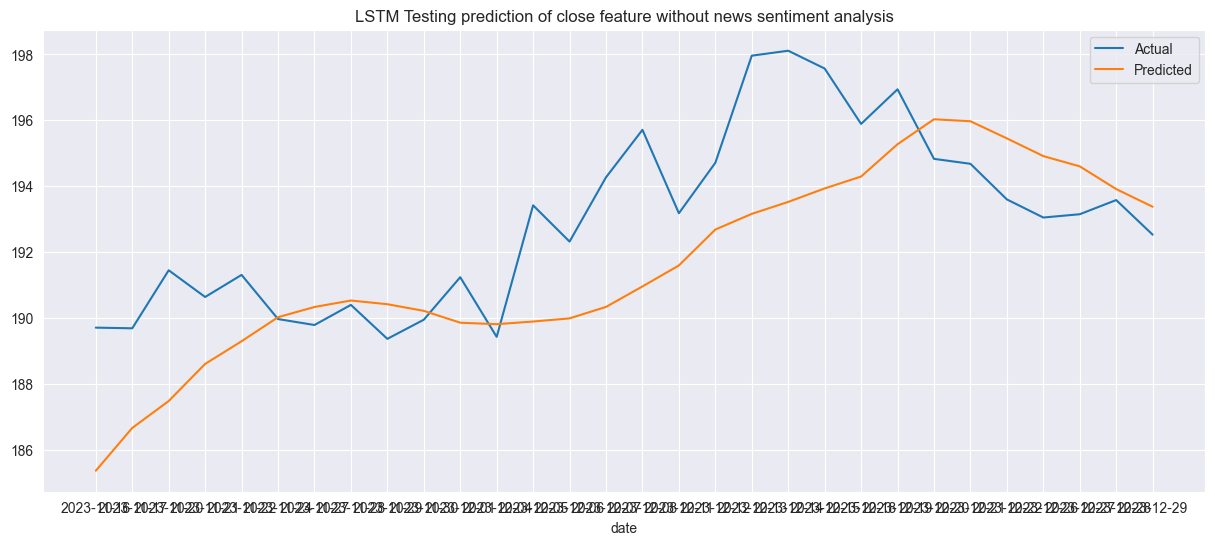

Mean square error for close =6.448997666210626
Total mean square error 6.448997666210626


In [18]:
plot_predictions_with_dates('Testing', False, testing_dates, y_test_actual_lstm, y_test_pred_lstm_without_news)

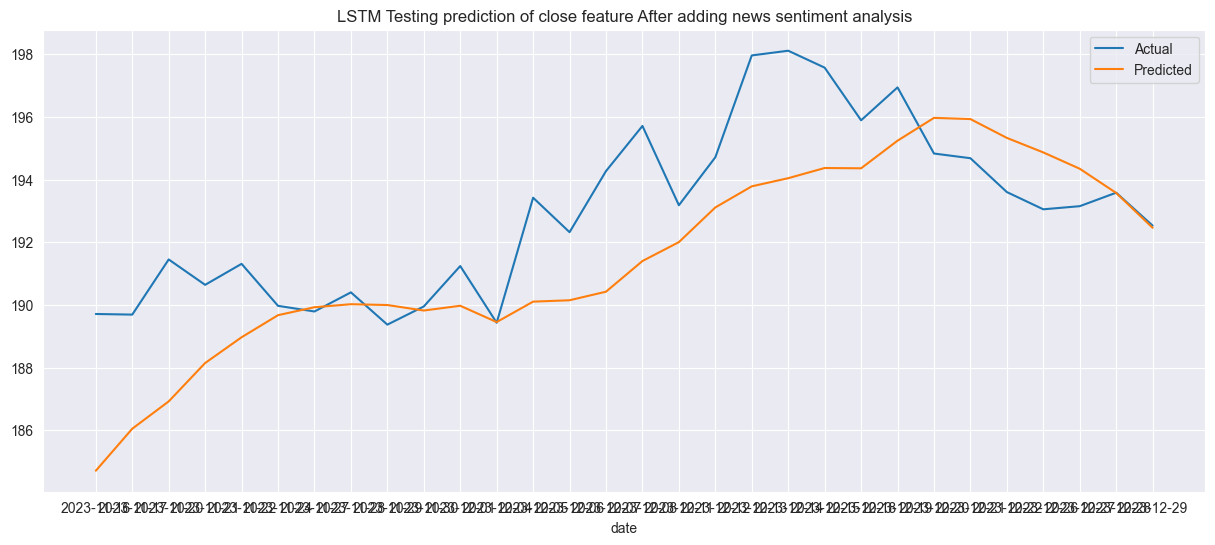

Mean square error for close =6.195454698853882
Total mean square error 6.195454698853882


In [19]:
plot_predictions_with_dates('Testing', True, testing_dates, y_test_actual_lstm, y_test_pred_lstm_news)